<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

## Imports

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt



In [3]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


## Splitting Train and Test and CV data 

In [4]:
print(X.shape)
print(y.shape)

(5000, 5)
(5000,)


In [5]:
x_train, x_test , y_train , y_test = train_test_split(X, y, stratify=y, test_size=0.2)
# print(x_train.shape, y_train.shape)
print(x_test.shape,  y_test.shape)
x_train, x_cv, y_train, y_cv   = train_test_split(x_train, y_train, stratify=y_train, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_cv.shape,  y_cv.shape)

(1000, 5) (1000,)
(3200, 5) (3200,)
(800, 5) (800,)


## Training Model

In [6]:
# you can write your code here

clf = SVC(gamma=0.001, C =100, kernel='rbf', verbose=2, random_state=42)
clf.fit(x_train, y_train)

[LibSVM]

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=2)

### Implementing Decision Function

In [7]:
def decision_function(data, clf):
    support_vec = clf.support_vectors_
    
    alpha_i = clf.dual_coef_.reshape(-1,1)
    output_list = np.array([])
    for query in data:
        sum_proba = 0
        for a_i,x_i in zip(alpha_i, support_vec):
            sum_proba += a_i *  np.exp(-1 * clf.gamma * np.sum(np.power(x_i-query, 2)) )
            
        output_list = np.append(output_list,sum_proba + clf.intercept_)
    return np.array(output_list)

### Checking Decision Function Results

In [8]:
# Applying Check for decision function
for a,b in zip(clf.decision_function(x_cv),decision_function(x_cv, clf)):
    if a != b:
        print('No match')

In [9]:
f_cv = decision_function(x_cv, clf)

In [10]:
f_cv.reshape(-1,1)

array([[-1.01306499e+00],
       [ 1.81417759e+00],
       [-1.85276537e+00],
       [-2.25913236e+00],
       [-1.97206052e+00],
       [-3.21948902e+00],
       [ 1.41860906e+00],
       [ 1.72792977e+00],
       [-1.73576864e+00],
       [ 2.10404599e+00],
       [-3.51814564e+00],
       [-2.54936032e+00],
       [-3.88061236e+00],
       [-2.35877663e+00],
       [-2.96598744e+00],
       [ 1.96926032e+00],
       [-2.74025904e+00],
       [-2.78592093e+00],
       [-3.98550001e+00],
       [-2.80129543e+00],
       [ 7.11816227e-01],
       [-2.99027660e+00],
       [-2.63797618e+00],
       [ 1.53986385e+00],
       [-2.79334973e+00],
       [ 1.50935127e+00],
       [-4.52854997e-01],
       [-3.45369789e+00],
       [-9.84138671e-01],
       [-1.66503986e+00],
       [-1.81194271e+00],
       [-2.50666769e+00],
       [-2.11734921e+00],
       [-3.37508978e+00],
       [-3.19581465e+00],
       [-2.39564187e+00],
       [-1.95746906e+00],
       [-3.20104154e+00],
       [ 3.2

In [11]:
y_pred = np.where(f_cv < 0 ,0,1)

In [12]:
y_pred2 = clf.predict(x_cv)

In [13]:
conf1 = confusion_matrix(y_cv, y_pred)
conf2 = confusion_matrix(y_cv, y_pred2)
print('Confusion Matrix via Self Decision Function')
print(conf1)
print('Confusion Matrix via Prediction Method of SVM Classfifier')
print(conf2)

Confusion Matrix via Self Decision Function
[[530  28]
 [ 34 208]]
Confusion Matrix via Prediction Method of SVM Classfifier
[[530  28]
 [ 34 208]]


<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

### Creating y+ and y- datasets

In [14]:
n_pos = y_train[y_train == 1].shape[0]

n_neg = y_train[y_train == 0].shape[0]

y_pos = ((n_pos + 1)/(n_pos + 2))

y_neg = ((1)/(n_neg + 2))

print('New Postive and Negative Values y_cv')
print(y_pos, y_neg)

y_cv_new = np.array([])

for ele in y_cv:
    if ele == 0:
        y_cv_new = np.append(y_cv_new, y_neg)
    else:
        y_cv_new = np.append(y_cv_new, y_pos)

print(y_cv.shape)
print(y_cv_new.shape)

New Postive and Negative Values y_cv
0.9989701338825953 0.0004478280340349306
(800,)
(800,)


### Defining Functions for Platt's Scaling 

In [15]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def gradient_dw(x, y, w, b, alpha, N):
    return x * (y - sigmoid(np.dot(w,x) + b)) + 2 * (alpha/N) * w

def gradient_db(x, y, w, b):
    return y - sigmoid(np.dot(w,x) + b)

def weights_init(x_train):
    b = 0
    w = np.zeros(x_train.shape[0])
    return w, b

def log_loss(y_true, y_pred):
    
    n = y_true.shape[0]
    log_loss = (-1/n) * np.sum(y_true * np.log10(y_pred) + (1-y_true) * np.log10(1-y_pred))
    return log_loss

def train(x_train, y_train, alpha, eta, epochs, verbose = 0):
    
    w, b = weights_init(x_train[0])
    
    old_loss = 0
    
    N = x_train.shape[0]
    
    for epoch in range(1,epochs+1):
        
        for x , y in zip(x_train, y_train):
            w = w + eta * gradient_dw(x, y, w, b, alpha, N)
            b = b + eta * gradient_db(x, y, w, b)
        
        y_pred = np.array([])
        for x in x_train:
            y_pred = np.append(y_pred, sigmoid(np.dot(w,x) + b))
        
        
        epoch_loss = log_loss(y_train , y_pred)
        if verbose > 0:
            print('Epoch {} Loss {}'.format(epoch, epoch_loss))
        
        if np.absolute(epoch_loss - old_loss) < 10 ** -5:
            break
        
        old_loss = epoch_loss
        
    return w, b

### Hyperparameter Tuning for Platt's Scaling

In [17]:
alpha = [10**x for x in range(-5, 2)]
eta   = [10**x for x in range(-5, 2)]
f_test = decision_function(x_test, clf)

loss_dict_cv = {}
loss_dict_test = {}

for a_i in alpha:
    for e_i in eta:
        print('Training for alpha = {} eta = {} parameters'.format(a_i, e_i))
        w, b = train(f_cv.reshape(-1,1), y_cv_new, a_i, e_i, 1000)
        y_pred = np.array([])
        for ele in f_cv:
            y_pred = np.append(y_pred, sigmoid(np.dot(w,ele)+ b))
        loss_dict_cv['{}-{}'.format(a_i,e_i)]  = log_loss(y_cv, y_pred)    
        
        y_pred = np.array([])
        for ele in f_test:
            y_pred = np.append(y_pred, sigmoid(np.dot(w,ele)+ b))
        loss_dict_test['{}-{}'.format(a_i,e_i)]  = log_loss(y_test, y_pred)    

Training for alpha = 1e-05 eta = 1e-05 parameters
Training for alpha = 1e-05 eta = 0.0001 parameters
Training for alpha = 1e-05 eta = 0.001 parameters
Training for alpha = 1e-05 eta = 0.01 parameters
Training for alpha = 1e-05 eta = 0.1 parameters
Training for alpha = 1e-05 eta = 1 parameters
Training for alpha = 1e-05 eta = 10 parameters


/home/parth/AppliedAI/appliedai/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/home/parth/AppliedAI/appliedai/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars
/home/parth/AppliedAI/appliedai/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


Training for alpha = 0.0001 eta = 1e-05 parameters
Training for alpha = 0.0001 eta = 0.0001 parameters
Training for alpha = 0.0001 eta = 0.001 parameters
Training for alpha = 0.0001 eta = 0.01 parameters
Training for alpha = 0.0001 eta = 0.1 parameters
Training for alpha = 0.0001 eta = 1 parameters
Training for alpha = 0.0001 eta = 10 parameters
Training for alpha = 0.001 eta = 1e-05 parameters
Training for alpha = 0.001 eta = 0.0001 parameters
Training for alpha = 0.001 eta = 0.001 parameters
Training for alpha = 0.001 eta = 0.01 parameters
Training for alpha = 0.001 eta = 0.1 parameters
Training for alpha = 0.001 eta = 1 parameters
Training for alpha = 0.001 eta = 10 parameters
Training for alpha = 0.01 eta = 1e-05 parameters
Training for alpha = 0.01 eta = 0.0001 parameters
Training for alpha = 0.01 eta = 0.001 parameters
Training for alpha = 0.01 eta = 0.01 parameters
Training for alpha = 0.01 eta = 0.1 parameters
Training for alpha = 0.01 eta = 1 parameters
Training for alpha = 0.

/home/parth/AppliedAI/appliedai/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/parth/AppliedAI/appliedai/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in add


Training for alpha = 10 eta = 1e-05 parameters
Training for alpha = 10 eta = 0.0001 parameters
Training for alpha = 10 eta = 0.001 parameters
Training for alpha = 10 eta = 0.01 parameters
Training for alpha = 10 eta = 0.1 parameters
Training for alpha = 10 eta = 1 parameters
Training for alpha = 10 eta = 10 parameters


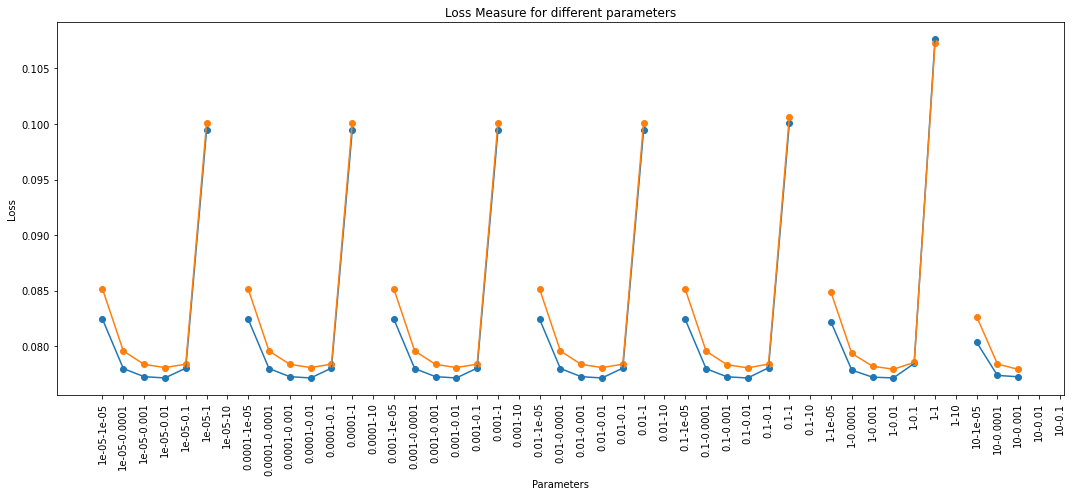

In [18]:
_, ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(list(loss_dict_cv.keys()), list(loss_dict_cv.values()))
ax.scatter(list(loss_dict_cv.keys()), list(loss_dict_cv.values()))
ax.plot(list(loss_dict_test.keys()), list(loss_dict_test.values()))
ax.scatter(list(loss_dict_test.keys()), list(loss_dict_test.values()))
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.set_title('Loss Measure for different parameters')
ax.set_ylabel('Loss')
ax.set_xlabel('Parameters')
plt.tight_layout()
plt.show()

In [19]:
loss_dict_cv = sorted(loss_dict_cv.items(), key = lambda x: x[1] )

In [20]:
print('Best Param ' ,','.join(loss_dict_cv[0][0].split('-')))

Best Param  0.1,0.01


### Training of Best Parameters

In [21]:
w, b = train(f_cv.reshape(-1,1), y_cv_new, 1, 0.01, 1000)

In [22]:

y_pred = np.array([])
for ele in f_test:
    y_pred = np.append(y_pred, sigmoid(np.dot(w,ele)+ b))

In [23]:
log_loss(y_test, y_pred)

0.0779166007024979

In [24]:
y_pred = y_pred *100

In [25]:
print('Checkingtop 20 elements,  probabilities with actual values of y_test')
for ind,ele in enumerate(y_pred[:20]):
    print(ele, y_test[ind], sep=' => ')        

Checkingtop 20 elements,  probabilities with actual values of y_test
7.697602594808421 => 0
0.08603880562043635 => 0
85.7819758453257 => 1
0.8458968997402113 => 0
77.56054978759357 => 1
0.2481167523390453 => 0
97.65810229470084 => 1
31.023697417615846 => 1
90.14676145142121 => 1
0.03797542586367156 => 0
0.19601913388205933 => 0
98.02250939438711 => 1
96.4544249669132 => 1
0.31835570630484505 => 0
98.18424893263746 => 1
0.26719204186116546 => 0
92.94802693791469 => 1
0.7533105089744444 => 0
0.5890491407991786 => 0
0.5498697699469004 => 0


__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
